<a href="https://colab.research.google.com/github/nguyenthanhphat-144/TTNT/blob/main/Tuan4_bai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Kết quả TSP Held-Karp ===
Chi phí tối thiểu: 80
Chu trình tối ưu: [0, 2, 3, 1, 0]


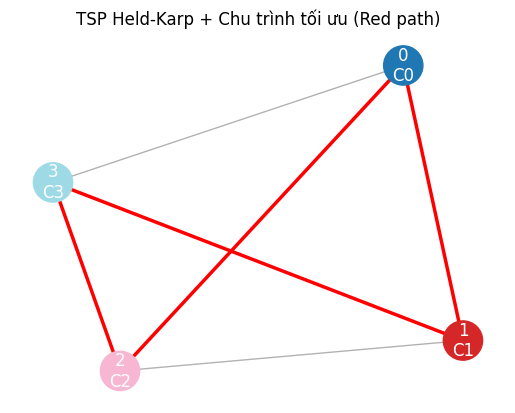

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ==========================
# 1) Held-Karp DP TSP
# ==========================
def tsp_held_karp(cost):
    n = len(cost)
    dp = [[float('inf')] * n for _ in range(1 << n)]
    parent = [[-1] * n for _ in range(1 << n)]

    dp[1][0] = 0  # bắt đầu từ thành phố 0

    for mask in range(1 << n):
        for u in range(n):
            if not (mask & (1 << u)):
                continue
            for v in range(n):
                if mask & (1 << v):
                    continue
                if cost[u][v] == 0:
                    continue
                new_mask = mask | (1 << v)
                new_cost = dp[mask][u] + cost[u][v]
                if new_cost < dp[new_mask][v]:
                    dp[new_mask][v] = new_cost
                    parent[new_mask][v] = u

    # quay về 0
    mask_all = (1 << n) - 1
    best_cost = float('inf')
    last = -1
    for i in range(1, n):
        if dp[mask_all][i] + cost[i][0] < best_cost:
            best_cost = dp[mask_all][i] + cost[i][0]
            last = i

    # hồi ngược ra chu trình
    path = [0]
    curr = last
    mask = mask_all
    while curr != 0:
        path.append(curr)
        prev = parent[mask][curr]
        mask ^= (1 << curr)
        curr = prev
    path.append(0)
    path.reverse()

    return best_cost, path


# ==========================
# 2) Xây dựng đồ thị NetworkX
# ==========================
def build_graph(cost):
    n = len(cost)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if cost[i][j] != 0:
                G.add_edge(i, j, weight=cost[i][j])
    return G


# ==========================
# 3) Tô màu và hiển thị chu trình
# ==========================
def draw_tsp_graph(G, tsp_path):
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap("tab20")

    # gán màu cho từng node
    node_colors_idx = list(range(len(G.nodes())))
    node_colors = [cmap(i / max(node_colors_idx)) for i in node_colors_idx]

    # vẽ tất cả các cạnh
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    # vẽ các node
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    # nhãn node
    labels = {n: f"{n}\nC{node_colors_idx[n]}" for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_color="white")

    # vẽ chu trình tối ưu
    path_edges = [(tsp_path[i], tsp_path[i + 1]) for i in range(len(tsp_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title(f"TSP Held-Karp + Chu trình tối ưu (Red path)")
    plt.axis('off')
    plt.show()


# ==========================
# 4) Ví dụ chạy thử
# ==========================
if __name__ == "__main__":
    # ma trận chi phí 4 thành phố
    cost = np.array([
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ])

    best_cost, path = tsp_held_karp(cost)

    print("=== Kết quả TSP Held-Karp ===")
    print("Chi phí tối thiểu:", best_cost)
    print("Chu trình tối ưu:", path)

    G = build_graph(cost)
    draw_tsp_graph(G, path)
